# Sequential Prediction: Introduction to RNNs

Today is about another widely used kind of neural networks: the Recurrent Neural Networks. They are used in many modern applications requiring to handle sequences of information, such as language translation or speech recognition.

# I. A Sequential Problem

## I.1 What is sequential information?

Let's consider a typical problem: you have an image of a ball in motion, like the following, can you predict where the ball will go next?

![](images/ball_alone.png)

Unless you know newtonian physics better than any current scientist, you can not predict where the ball will go.

But now assume that you have some previous positions of the ball as well, like in the following image, can you predict the direction?

![](images/ball_with_previous.png)

Sure you can, because you have a sequential information: not just a snapshot a given time, but **several snapshots** at different times.

## I.2 Examples of sequential problems

You are playing everyday with sequential information, without even noticing it!

For example, audio signals (music, speech, any sound...) are sequential information.

![](images/Audio-Waveforms.jpg)

An audio signal is just a long list of numbers, they represent a sequence of amplitude.

Another good example is what you are just reading... **a sentence is a sequence of words**!

Thus, there are numbers of sequential problems:
* Language translation
* speech recognition
* music generation
* sentiment classification
* video activity
* ...

## I.3 Limitations of classical approaches

Let's take a simple case. We have the following problem:

![](images/cat_sentence.png)

How would you solve it using machine learning and NLP?

**Idea 1**: a window of few previous words and one hot encoding:
![](images/idea1.png)

This is a good idea, but what if we have long term dependencies, like in a sentence like the following:
> "I used to live in China when I was a kid, even though I'm French. That's why I speak fluent ..."

Would that work on this kind of sentence? Wouldn't it predict that the guy speaks French while it is meant to predict Chinese?

**Idea 2**: a BOW:
![](images/idea2.png)

BOW and TF-IDF are powerful features. But they **do not preserve order** of the sequence. For a BOW, the two following sentences are the same:

> "The food is **good**, **not bad** at all!"

> "The food is **bad**, **not good** at all!"

This is a serious issue when dealing with sentiment analysis!

# II. RNN Basics

## II.1 Requirements to handle sequential information

To properly handle sequential information, here is what we would need to do:
- handle variable length sequences
- track long-term dependencies
- keep information about order
- share parameters across the sequence

Well, **Recurrent Neural Networks (RNN)** can do most of it, let's see how!

## II.2 Representation

Up to now, you used to see diagrams where neural networks are going from left (with the features) to right (with the prediction).

![](images/MLP_with_activations.png)

When using recurrent neural networks, we will change this representation to the following:
![](images/RNN_representation.png)

Where in blue are the input features, in green here are the layers of the neural network, and in purple the prediction.

## II.3 Types of RNN 

Depending on the problem to solve, many types of RNN can be used. Indeed, a sentiment analysis (one ouput) or a language translation (multiple output) have different requirements.

![](images/RNN_types.png)

So to summarize:
- A one-to-one is a MLP as you already know it
- A many-to-many could be a translation model: it inputs a sequence of words in english and outputs a sequence of words in french
- A many-to-one could be a sentiment analysis model: it inputs a sequence of words and outputs a review

## II.4 Hidden state

Before digging into the details of the computation, one more concept to add is the **hidden state**.

![](images/hidden_state.png)

Actually, as you will see in the next section, a RNN has a two step computation. First, you compute a **hidden state** $h_t$ using both:
- the input features $x_t$
- the previous hidden state $h_{t-1}$

After that only, you compute the prediction $\hat{y}$ using this hidden state $h_t$.

# III. RNN Computation

## III.1 Step-by-step computation

So, how does a RNN computes predictions?

We will consider $x_1$, $x_2$, $x_3$... $x_t$ to be the words number 1, 2, 3... t of a sentence in english.

The target $y_1$, $y_2$, $y_3$... $y_t$ are the words number 1, 2, 3... t of the same sentence in french.

So our neural network will look like this:

![](images/RNN_ex1.png)

In a RNN, actually the same weights are shared for all steps of the sequence:

![](images/RNN_ex3.png)

The weights $W_{xh}$ and $W_{hh}$ will allow to compute the hidden state as a perceptron would do:

$$
\large h_t = g(W_{hh} h_{t-1} + W_{xh} X_t + b)
$$

This is just like a perceptron, or a classical neural network, where $W_{xh} X_t$ is a weighted sum of features $X_t$, and $g$ is just an activation function.

Then the second step will be to compute the predictions $\hat{y}$.

![](images/RNN_ex4.png)

This is where the weights $W_{hy}$ appear. Using those weights, this will again work just like a perceptron:

$$
\large \hat{y_t} = g(W_{hy} h_{t} + b)
$$

## III.2 Loss computation

You might be wondering... how do we compute the loss in such a complicated network? And thus, what do we minimize with gradient descent?

Each time step is a regular neural network (a MLP). So, we can compute a loss for each time step, right?

![](images/RNN_losses1.png)

So that at each step *t*, we end up with a loss $L_t$. Then, sum them and you will have the global loss!
![](images/RNN_losses2.png)

# IV. Application to movie review analysis

## IV.1 Preprocessing the data

The IMDB movie review dataset is a dataset containing review for movies, as well as an associated label 0 (negative review) or 1 (positive review).

Let's load it.

In [1]:
import numpy as np
from tensorflow.keras import datasets
imdb = datasets.imdb

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

X_train.shape, y_train.shape

((25000,), (25000,))

In [2]:
print('possible labels:', np.unique(y_train))

possible labels: [0 1]


The train set is composed of 25000 samples. In each training sample, there is a list of numbers, corresponding to the output of a BOW with 10000 words:

In [3]:
print(X_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]


Explore the dataset: you can make use of the function `imdb.get_word_index()` to get back to words and display some reviews. 

Be careful, the word indices `0`, `1`, `2` and `3` are reserved and mean no word in our dataset:
 - `0` stands for padding
 - `1` stands for start
 - `2` stands for unknown

In [4]:
# A dictionary mapping words to an integer index
imdb = datasets.imdb
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [5]:
decode_review(X_train[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly <UNK> was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little <UNK> that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big <UNK> for the whole film but these children are amazing and should be <UNK> for what the

So the training set actually is a sequence of words, encoded into numbers.

The dataset is already preprocessed, which is highly convenient. But still, the sequences may not have the same length:

In [6]:
print('length of sequence 0:', len(X_train[0]))
print('length of sequence 1:', len(X_train[1]))

length of sequence 0: 218
length of sequence 1: 189


We will have to pad our training set. Because Keras currently does not support to have sequences of variable length.

This is exactly what we did with images in CNN: we will add zeros so that all the sequences have the same length.

But to choose a length for padding, it is first a good practice to look at the statistics of the dataset.

mean length: 238.71364
min length: 11
max length: 2494


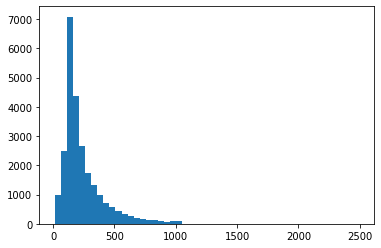

In [7]:
import matplotlib.pyplot as plt
import numpy as np

lengths = []
for seq in X_train:
    lengths.append(len(seq))

print("mean length:", np.mean(lengths))    
print("min length:", np.min(lengths))    
print("max length:", np.max(lengths))    

plt.hist(lengths, bins=50)
plt.show()

We can now decide what length to keep, and check all sequences have the same length:

In [8]:
from tensorflow.keras.preprocessing import sequence

X_train = sequence.pad_sequences(X_train,
                                 value=0,
                                 padding='post', # to add zeros at the end
                                 truncating='post', # to cut at the end
                                 maxlen=128) # the length we want

X_test = sequence.pad_sequences(X_test,
                                value=0,
                                padding='post', # to add zeros at the end
                                truncating='post', # to cut at the end
                                maxlen=128) # the length we want

In [9]:
print('length of sequence 0:', len(X_train[0]))
print('length of sequence 1:', len(X_train[1]))

length of sequence 0: 128
length of sequence 1: 128


## IV.2 Building a RNN

Now we will build a RNN to predict the labels. We can build a RNN with two layers and 8 units each. Finally we will add a sigmoid dense layer that computes the final prediction.

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding


def my_RNN():

    model = Sequential()
    # The input_dim is the number of different words we have in our corpus: here 5000
    # The input_length is the length of our sequences: here 128 thanks to padding
    model.add(Embedding(input_dim=5000, output_dim=32, input_length=128))

    # We add two layers of RNN 
    model.add(SimpleRNN(units=8, activation='relu', return_sequences=True))
    model.add(SimpleRNN(units=8, activation='relu', return_sequences=False))
    
    # Finally we add a sigmoid
    model.add(Dense(units=1, activation='sigmoid'))

    return model

Several things can be noticed here:
- We have an `Embedding` layer: it converts our one hot encoding of words input into Word Embedding like numbers, so here basically each word is transformed into a 32 features array
- We have stacked two `RNN` layers: this does not mean we are doing two RNN, this just means our neural network contains two layers
- This first `RNN` has `return_sequences=True` and the second one has `return_sequences=False`: indeed the sequence is needed when another layer of `RNN` is added. The thumb rule for *many-to-one* is: `return_sequences=True` when there is another `RNN` layer, `return_sequences=False` otherwise

As you already know, we can then compile the model:

In [11]:
model = my_RNN()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Finally, let's train our RNN:

In [12]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=5, batch_size=128)

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 20s 801us/sample - loss: 0.6528 - accuracy: 0.5955 - val_loss: 0.5234 - val_accuracy: 0.7802
Epoch 2/5
25000/25000 [==============================] - 17s 684us/sample - loss: 0.4684 - accuracy: 0.8016 - val_loss: 0.4347 - val_accuracy: 0.8160
Epoch 3/5
25000/25000 [==============================] - 17s 677us/sample - loss: 0.3767 - accuracy: 0.8385 - val_loss: 0.4254 - val_accuracy: 0.8151
Epoch 4/5
25000/25000 [==============================] - 17s 685us/sample - loss: 0.3476 - accuracy: 0.8548 - val_loss: 0.4538 - val_accuracy: 0.7850
Epoch 5/5
25000/25000 [==============================] - 17s 685us/sample - loss: 0.3240 - accuracy: 0.8658 - val_loss: 0.4390 - val_accuracy: 0.8146


In [13]:
from sklearn.metrics import accuracy_score

print('accuracy on train with NN:', model.evaluate(X_train, y_train, verbose=0)[1])
print('accuracy on test with NN:', model.evaluate(X_test, y_test, verbose=0)[1])

accuracy on train with NN: 0.88588
accuracy on test with NN: 0.81456


The accuracy is quite high for such a simple RNN: it took only a few lines of code and a couple of minutes to reach an accuracy greater than 80%!